D:\Programing\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



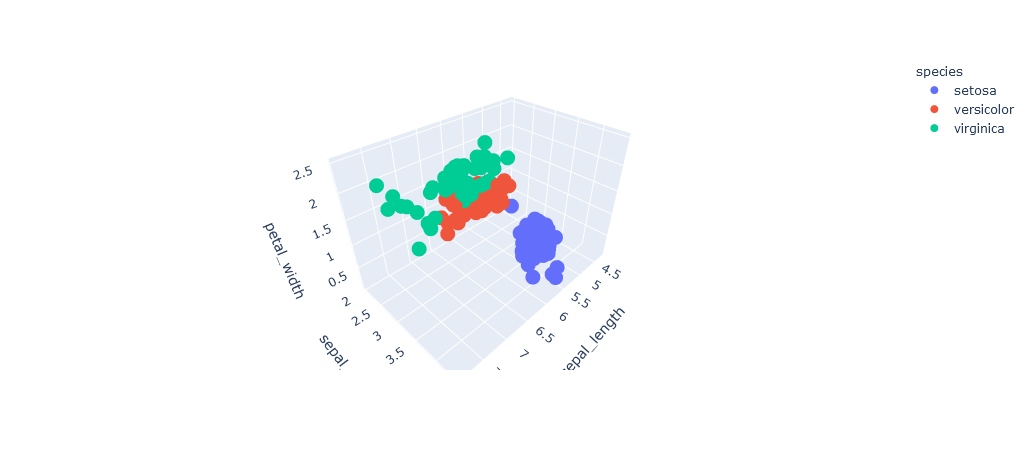

In [32]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
digits = datasets.load_digits()
n = len(digits.images)

In [4]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
digits.images.shape

(1797, 8, 8)

In [9]:
images = digits.images.reshape((n, -1))
images.shape

(1797, 64)

In [11]:
pca = PCA(n_components=0.8)
pca_images = pca.fit_transform(images)

In [14]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [15]:
pca.explained_variance_ratio_[:3].sum()

0.40303958587675087

In [21]:
labels = digits.target
labels.shape

(1797,)

In [37]:
n = 200
x = pca_images[:n, 0]
y = pca_images[:n, 1]
z = pca_images[:n, 2]
lb = labels[:n]

In [39]:
import pandas as pd

x=pd.Series(x, name='x')
y=pd.Series(y, name='y')
z=pd.Series(z, name='z')
lb=pd.Series(lb, name='label')

In [40]:
df=pd.concat([x, y, z, lb], axis=1)

In [41]:
df

,x,y,z,label
0,-1.259466,21.274883,-9.463055,0
1,7.957611,-20.768699,4.439506,1
2,6.991923,-9.955986,2.958558,2
3,-15.906105,3.332464,9.824372,3
4,23.306867,4.269061,-5.675129,4
...,...,...,...,...
195,23.703125,5.465915,15.198829,6
196,18.444521,13.382770,17.784030,6
197,18.897535,16.661202,15.167019,6
198,21.096009,-12.783755,5.146913,4


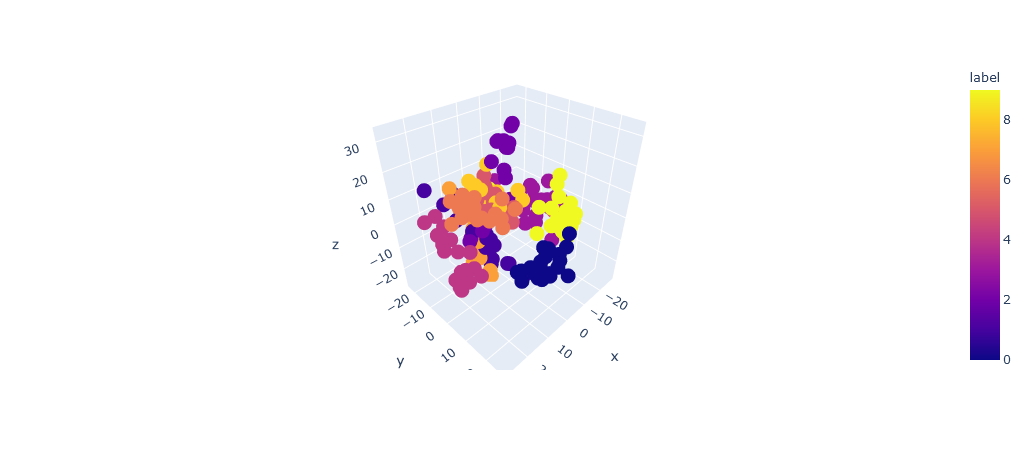

In [43]:
import plotly.express as px
fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')
fig.show()